In [37]:
#step1: Import the required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from IPython.core.pylabtools import figsize
figsize(10, 6) #width and hight




In [38]:
#step 2 dataset
project =pd.read_csv("train.csv", sep=",")
project.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [39]:
#project.describe()
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

In [4]:
print(project.shape)

(1039, 14)


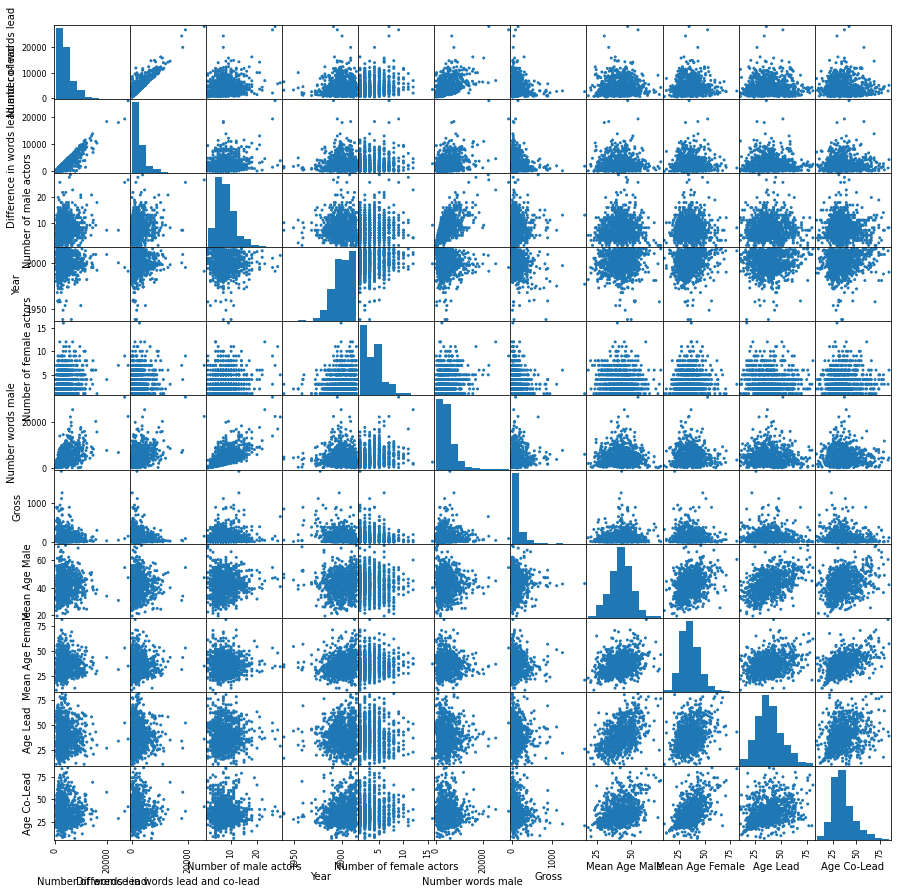

In [42]:
pd.plotting.scatter_matrix(project.iloc[:, 2:15], figsize(15,15))
plt.show()


In [45]:
X = project.iloc[:,:-1]
#print(X)
Y = pd.get_dummies(project["Lead"]).drop("Male", axis=1)
#print(Y)


In [70]:
#np.random.seed(1)
#print(project.shape)
#trainI= np.random.choice(project.shape[0], size=519, replace= False)
#trainIndex = project.index.isin(trainI)
#train_new = project.iloc[trainIndex] #training set
#test = project.iloc[~trainIndex] #test set
#X_train, X_test, y_train, y_test = train_test_split(X, Y, )


seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state = seed, stratify = Y)



(1039, 14)


In [71]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print('model summary:')
print(model)


model summary:
LogisticRegression()


/Users/marziehrahnama/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/marziehrahnama/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
predict_prob = model.predict_proba(X_test)
print(model.classes_)
predict_prob[:5]

[0 1]


array([[0.55771238, 0.44228762],
       [0.51888292, 0.48111708],
       [0.91082461, 0.08917539],
       [0.98244691, 0.01755309],
       [0.85887267, 0.14112733]])

In [107]:
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>0.5, 'Male', 'Famele')
prediction[0: 20]

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Famele', 'Male',
       'Male', 'Male', 'Male', 'Male'], dtype='<U6')

In [108]:
#confusion matrix
print(pd.crosstab(Y_train.iloc[:,0],model.predict(X_train)))



col_0     0   1
Female         
0       520  29
1       121  57


In [113]:

#Accuracy
print(np.mean(prediction == Y_train))

<ipython-input-113-32504ae34c83>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(np.mean(prediction == Y_train))


ValueError: Unable to coerce to Series, length must be 1: given 312